## 1. Tyrimo pavadinimas, autorius, akademinė grupė, data.
__Tyrimo pavadinimas:__ Modestas Rimeikis  
__Autorius__: Modestas Rimeikis  
__Akademinė grupė__: MGDVDAM-2  
__Data__: 2023-11-07  


## 2. Tikslas ir uždaviniai (bent 3, įskaitant apžvalginę duomenų analizę) jam pasiekti.  
__Tikslas__: Remiantis paskolos pareiškėjų duomenimis sukurti nuspėjamuosius modelius, kurie įvertintų paskolos įsipareigojimų neįvykdymo tikimybę. Šie modeliai padės skolintojams ir finansų įstaigoms priimti labiau pagrįstus sprendimus vertinant paskolos prašytojus. 

__Uždaviniai__: 
1. Atlikti apžvalginę duomenų analizę.
2. Sukurti universalų modelį, kuris gebėtų atlikti įvairiausias funkcijas, grafiškai pateikti rezultatus su nurodytų paskolų prašytojų duomenų rinkiniu.
3. Sukurti nuspėjamąjį modelį, remiantis atsitiktinio miško algoritmu, kuris padėtų įvertinti paskolų prašytojų įsipareigojimų neįvykdymo tikimybę bei įvertinti jo gebėjimą grąžinti paskolą.


## 3. Duomenys  
__ID__: Kiekvieno paskolos paraiškėjo unikalus inderifikatorius  
__Age__: Paskolos paraiškėjo amžius  
__Income__: Paskolos paraiškėjo pajamos  
__Home__: Namo, kuriame gyvena paskolos prašytojas, statusas (nuosavas, nuoma arba hipoteka)  
__Emp_Length__: Paskolos paraiškėjo darbo metų stažas  
__Intent__: Paskolos tikslas (galimi variantai: mokslui, būstui arbo jo patobulinimui)  
__Amount__: Paskolos dydis  
__Rate__: Paskolos palūkanų norma  
__Status__: Būsena: paskolos patvirtinimo būsena (visiškai sumokėta, apmokestinta, dabartinė).  
__Percent_Income__: Rodiklis, nurodantis kiek nuo asmeninių pajamų naudojama paskolos įmokoms.  
__Default__: Rodiklis, nurodantis, ar pareiškėjas anksčiau negrąžino paskolos (taip, ne).  
__Credit_Length__: Pareiškėjo kredito istorijos trukmė.  

### Atsitiktiniai miškai

Atsitiktiniai miškai yra vienas populiariausių mašininio mokymosi algoritmų, nes paprastai užtikrina gerą nuspėjamumo našumą, mažai permontuoja ir lengvai interpretuoja duomenis. Atsitiktinių miškų algoritmui nesunku nustatyti kiekvieno kintamojo svarbą sprendimų medyje, o tai reiškia, kad nėra sudėtinga apskaičiuoti kiek kiekvienas kintamasis prisideda prie sprendimo priėmimo. 

Atsitiktiniai miškai susideda iš 4–12 šimtų sprendimų medžių, kurių kiekvienas sukurtas atsitiktinai ištraukus stebėjimus iš duomenų rinkinio ir atsitiktinai ištraukus ypatybes. Ne kiekvienas medis mato visas ypatybes ar visus pastebėjimus, ir tai garantuoja, kad medžiai yra dekoreliuojami ir todėl yra mažiau linkę per daug derėti. Kiekvienas medis taip pat yra taip-ne klausimų seka, pagrįsta vienu ar jų deriniu. Kiekviename mazge (tai yra kiekviename klausime) trys padalija duomenų rinkinį į 2 segmentus, kurių kiekviename yra stebėjimai, kurie yra panašesni tarpusavyje ir skiriasi nuo kito segmento.

Tačiau yra ir šio mokymosi algoritmo limitacijų:

- Susijusioms savybėms bus suteikta vienoda arba panaši svarba, bet apskritai mažesnė svarba, palyginus su tuo pačiu medžiu, sukurtu be koreliuojančių atitikmenų.
- Atsitiktiniai miškai ir sprendimų medžiai apskritai teikia pirmenybę ypatybėms, turinčioms didelį kardinalumą (medžiai yra linkę į tokio tipo kintamuosius).


## 4. Tiriamoji dalis

In [1]:
import pandas as pd
from data_configurator import ChangeStrategy
from data_configurator import DataConfigurator
from loan_applicant import LoanApplicantProfile

strategy = ChangeStrategy.mean

creditRiskDF = pd.read_csv('credit_risk.csv', index_col="Id")
creditRiskDF.info()

dataConfigurator = DataConfigurator(creditRiskDF)
dataConfigurator.replace_numeric_nan(strategy)
dataConfigurator.replace_non_numeric_to_most_frequent()
dataConfigurator.drop_dublicates()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32780
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32581 non-null  int64  
 1   Income          32581 non-null  int64  
 2   Home            32581 non-null  object 
 3   Emp_length      31686 non-null  float64
 4   Intent          32581 non-null  object 
 5   Amount          32581 non-null  int64  
 6   Rate            29465 non-null  float64
 7   Status          32581 non-null  int64  
 8   Percent_income  32581 non-null  float64
 9   Default         32581 non-null  object 
 10  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.0+ MB
Before data frame configuration: 
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default 

In [2]:
column_number_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
loan_applicant_profile = dataConfigurator.convert_to_list_of_objects(LoanApplicantProfile, column_number_list)
for profile in loan_applicant_profile[:5]:
    print(str(profile))

ID: 2cce4cc1-7a74-4c46-bef3-5d8fdf2f5604, Age: 22.0, Income: 59000.0, 
        Home: RENT, Employment Length: 123.0, Intent: PERSONAL, Amount: 35000.0, 
        Rate: 16.02, Status: 1.0, Percent of Income: 0.59, 
        Default: Y, Credit Length: 3.0
ID: b4b827cf-3cf1-4c10-8af6-ea256795cd0c, Age: 21.0, Income: 9600.0, 
        Home: OWN, Employment Length: 5.0, Intent: EDUCATION, Amount: 1000.0, 
        Rate: 11.14, Status: 0.0, Percent of Income: 0.1, 
        Default: N, Credit Length: 2.0
ID: 690b98eb-b393-4037-a2ce-07335713e1e0, Age: 25.0, Income: 9600.0, 
        Home: MORTGAGE, Employment Length: 1.0, Intent: MEDICAL, Amount: 5500.0, 
        Rate: 12.87, Status: 1.0, Percent of Income: 0.57, 
        Default: N, Credit Length: 3.0
ID: bb7199f2-06d1-42d9-8b45-abc3bc3a5e9a, Age: 23.0, Income: 65500.0, 
        Home: RENT, Employment Length: 4.0, Intent: MEDICAL, Amount: 35000.0, 
        Rate: 15.23, Status: 1.0, Percent of Income: 0.53, 
        Default: N, Credit Length: 2.0
I

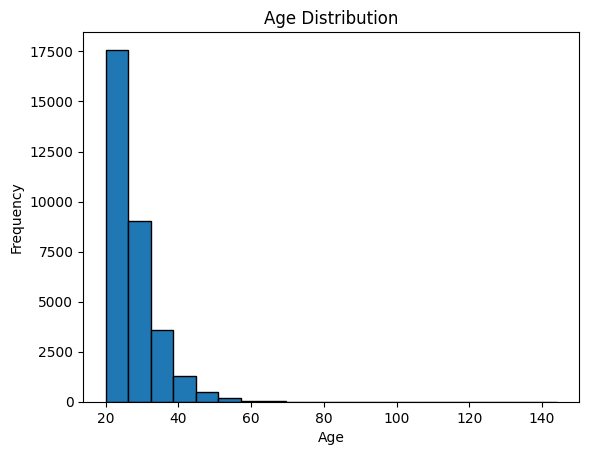

In [3]:
from credit_risk_manager import CreditRiskManager

creditRiskManager = CreditRiskManager(loan_applicant_profile)
# Let's check loan applicant age distribution
creditRiskManager.plot_age_distribution()

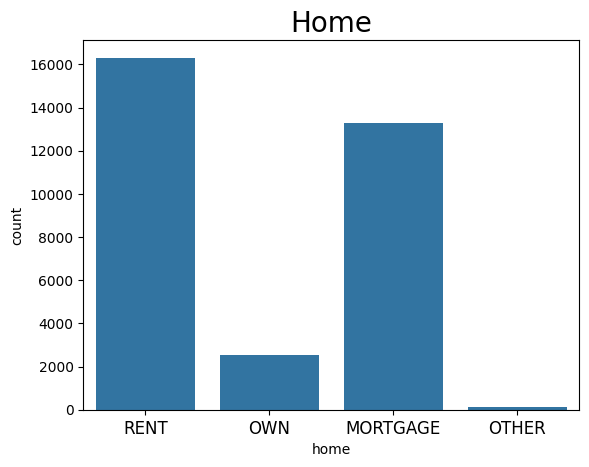

In [4]:
creditRiskManager.plot_home_type_distribution()

Iš namo, kuriame gyvana paskolos siekėjas, pobūdžio pasiskirstymo diagramos matome, kad dažniausiai paskolos siekiantys asmenys nuomoja butą. Tikėtina, kad skolinimo priežastis yra įsigyti nuosavą būstą.

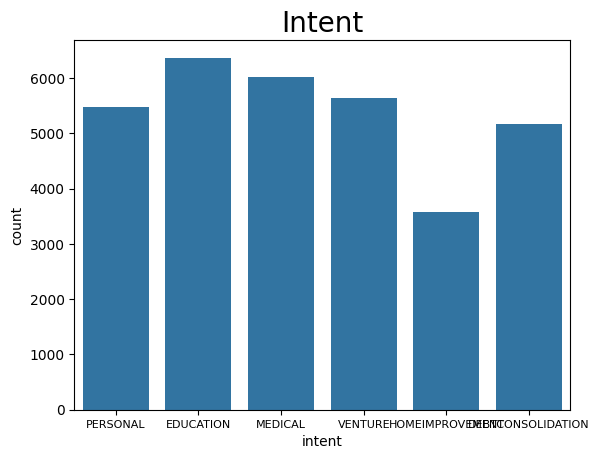

In [5]:
creditRiskManager.plot_intent_distribution()

Iš priežastingumo paskolos paėmimo diagramos matome, kad pagrindinės 3 priežastys skolintis ar imti paskolą yra:
- Mokslui
- Medicininiams tikslams
- Asmeninės

self._applicantsDF.corr() 
                     age    income      home  emp_length    intent    amount  \
age             1.000000  0.173383 -0.032967    0.160961  0.035762  0.050570   
income          0.173383  1.000000 -0.202999    0.132640  0.001450  0.265067   
home           -0.032967 -0.202999  1.000000   -0.228893  0.010032 -0.131281   
emp_length      0.160961  0.132640 -0.228893    1.000000  0.020243  0.111977   
intent          0.035762  0.001450  0.010032    0.020243  1.000000 -0.004930   
amount          0.050570  0.265067 -0.131281    0.111977 -0.004930  1.000000   
rate            0.010304  0.000912  0.132420   -0.053233 -0.001379  0.139717   
status         -0.023780 -0.145565  0.211112   -0.081633 -0.066128  0.106098   
percent_income -0.042190 -0.254472  0.141571   -0.052905  0.000650  0.573037   
default         0.004535 -0.003621  0.063055   -0.028069 -0.004194  0.039603   
cred_length     0.859297  0.117238 -0.026432    0.143288  0.035840  0.041760   

            

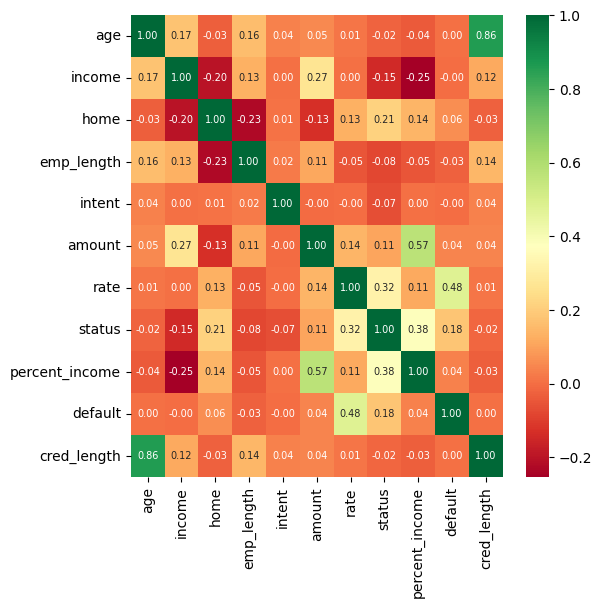

In [6]:
creditRiskManager.show_correlation_between_applicant_parameters()

Model accuracy score : 0.9154
feature_importance_df 
          Feature  Importance
7  percent_income    0.234553
6            rate    0.189602
1          income    0.163680
2            home    0.096852
5          amount    0.081888
4          intent    0.064643
3      emp_length    0.061935
0             age    0.050053
9     cred_length    0.039758
8         default    0.017035


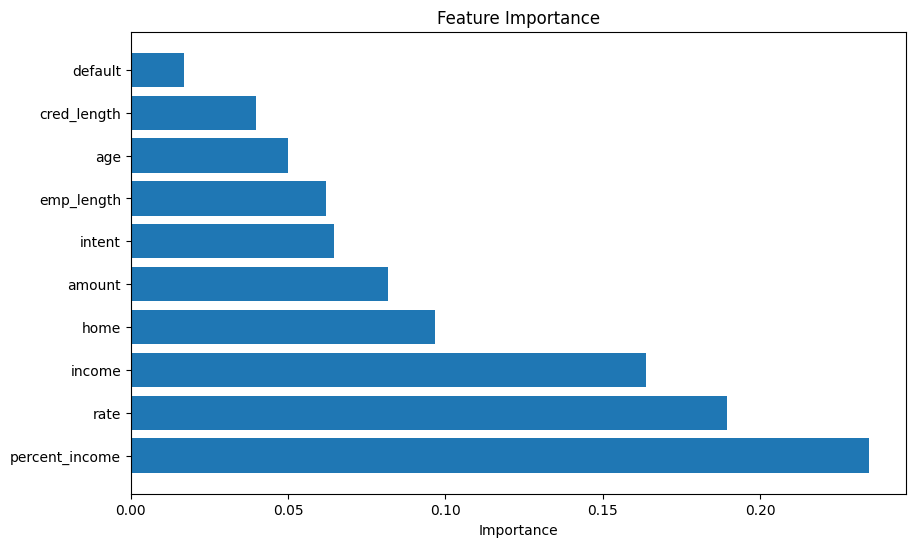

In [7]:
creditRiskManager.plot_applicant_parameter_importance()

## Sukūrus modelį, kuris remiasi atsitiktinio miško algoritmu, galima daryti tokias išvadas: 
- Rodiklis, nurodantis kiek nuo asmeninių pajamų naudojama paskolos įmokoms, yra svarbiausias faktorius iš turimų rodiklių apie paskolos prašytoją. Didelis "percent_income" lygis gali reikšti, kad paskolos įsipareigojimai sudaro didelę dalį nuo prašytojo pajamų, kas gali padaryti sunkiau grąžinti paskolą, o mažas "percent_income" lygis rodo, kad paskolos dydis yra maža dalis nuo pajamų.
- Antras pagal svarbumą rodiklis, kuris padeda nustatyti ar vartotojui suteikti paskolą yra paskolos palūkanų norma. Didesnė palūkanų norma gali padidinti paskolos atmetimo arba paskolos nurašymo tikimybę. Skolintojai šią savybę gali laikyti rizikos veiksniu.
- Trečias pagal svarbumą kriterijus - pareiškėjo pajamų dydis. Kuo didesnes pajamas pareiškėjas gauna, tuo didesnę tikimybė, kad jis gebėtų grąžinti pasiskolintus pinigus.

## 5. Literatūra:
- https://machinelearningmastery.com/calculate-feature-importance-with-python/
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f